In [84]:
# Extracting the dataset from the census data API
import pandas as pd

# MAKE SURE THERE ARE NO WHITE SPACES IN ANY VARIABLE STRINGS
labels = 'GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,NSFSZFI,NSFSZFI_LABEL,FACTORS_U,FACTORS_U_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,FIRMPDEMP_PCT,FIRMPDEMP_PCT_F,RCPPDEMP,RCPPDEMP_F,RCPPDEMP_PCT,RCPPDEMP_PCT_F,EMP,EMP_F,EMP_PCT,EMP_PCT_F,PAYANN,PAYANN_F,PAYANN_PCT,PAYANN_PCT_F,FIRMPDEMP_S,FIRMPDEMP_S_F,FIRMPDEMP_PCT_S,FIRMPDEMP_PCT_S_F,RCPPDEMP_S,RCPPDEMP_S_F,RCPPDEMP_PCT_S,RCPPDEMP_PCT_S_F,EMP_S,EMP_S_F,EMP_PCT_S,EMP_PCT_S_F,PAYANN_S,PAYANN_S_F,PAYANN_PCT_S,PAYANN_PCT_S_F'

data_group = '&for=us'  # FOR ENTIRE USA
#data_group = '&for=state' # FOR STATES

API_key = '&key=1ba63b3df04e1bd07755febe18f836df1b86fc9f'

df = pd.read_json(f'https://api.census.gov/data/2018/abstcb?get={labels}{data_group}{API_key}')
df.columns = df.iloc[0]
df = df[1:]

In [85]:
# Filtering data so that it will include only the totals for sex, veteran status, ethnic group, and sector.
df = df[df['SEX'].astype(str)=='001']
df = df[df['VET_GROUP'].astype(str)=='001']
df = df[df['ETH_GROUP'].astype(str)=='001']
df = df[df['NSFSZFI'].astype(str)=='001']



In [86]:
# Selecting Important Columns
df_selected = df[['RACE_GROUP_LABEL','NAICS2017_LABEL','FIRMPDEMP','FACTORS_U_LABEL']]

In [87]:
# Separating the data by race
df_white = df_selected[df_selected['RACE_GROUP_LABEL']=='White']
df_black = df_selected[df_selected['RACE_GROUP_LABEL']=='Black or African American']
df_asian = df_selected[df_selected['RACE_GROUP_LABEL']=='Asian']
df_native = df_selected[df_selected['RACE_GROUP_LABEL']=='American Indian and Alaska Native']

In [88]:
# Finding the total amount of responses from each race
white_ai_total = df_white['FIRMPDEMP'][df_white['FACTORS_U_LABEL'] == 'Artificial Intelligence: Total Reporting']
black_ai_total = df_black['FIRMPDEMP'][df_black['FACTORS_U_LABEL'] == 'Artificial Intelligence: Total Reporting']
asian_ai_total = df_asian['FIRMPDEMP'][df_asian['FACTORS_U_LABEL'] == 'Artificial Intelligence: Total Reporting']
native_ai_total = df_native['FIRMPDEMP'][df_native['FACTORS_U_LABEL'] == 'Artificial Intelligence: Total Reporting']

In [89]:
# Pulling out data as integers
for i in white_ai_total:
    white_ai_reporting = int(i)

for i in black_ai_total:
    black_ai_reporting = int(i)

for i in asian_ai_total:
    asian_ai_reporting = int(i)

for i in native_ai_total:
    native_ai_reporting = int(i)

In [90]:
# Creating a list for the percentages of each response
df_white_ai = df_white[0:11]
white_ai_list = []
for i in df_white_ai['FIRMPDEMP']:
    white_ai_list.append(100*int(i)/white_ai_reporting)
white_ai_list

[7.177889985735303,
 1.8880747078627316,
 0.8002366681668929,
 0.453273946074925,
 1.0628207765698514,
 0.7245776636645141,
 1.0120333035635998,
 1.3569072056275726,
 47.035296443638174,
 43.392515757839696,
 100.0]

In [91]:
df_black_ai = df_black[0:11]
black_ai_list = []
for i in df_black_ai['FIRMPDEMP']:
    black_ai_list.append(100*int(i)/black_ai_reporting)
black_ai_list

[9.285363859362224,
 1.6920141727991278,
 1.057508857999455,
 0.42082311256473154,
 1.3976560370673208,
 1.3278822567457074,
 0.9910057236304171,
 2.4769692014172797,
 44.598528209321344,
 42.51185609157809,
 100.0]

In [92]:
df_asian_ai = df_asian[0:11]
asian_ai_list = []
for i in df_asian_ai['FIRMPDEMP']:
    asian_ai_list.append(100*int(i)/asian_ai_reporting)
asian_ai_list

[11.587215196627715,
 3.1868096686409477,
 1.4155061095992743,
 0.8887465983672163,
 1.775572274691852,
 1.102395816658663,
 1.4641694680113122,
 2.132010031481778,
 43.360119524038204,
 40.78779147324049,
 100.0]

In [93]:
df_native_ai = df_native[12:23]
native_ai_list = []
for i in df_native_ai['FIRMPDEMP']:
    native_ai_list.append(100*int(i)/native_ai_reporting)
native_ai_list

[10.459051825400554,
 1.5317389465770803,
 0.8739369449795612,
 0.1926420147535592,
 1.6445050039937978,
 0.9491143165907062,
 0.8598411878024714,
 3.1292580933139127,
 45.07353286660715,
 42.35305173142884,
 100.0]

In [94]:
# Creating a list for the questions corresponding to each response
white_ai_label = []
for i in df_white['FACTORS_U_LABEL'][0:11]:
    white_ai_label.append(i)

black_ai_label = []
for i in df_black['FACTORS_U_LABEL'][0:11]:
    black_ai_label.append(i)

asian_ai_label = []
for i in df_asian['FACTORS_U_LABEL'][0:11]:
    asian_ai_label.append(i)

native_ai_label = []
for i in df_native['FACTORS_U_LABEL'][12:23]:
    native_ai_label.append(i)

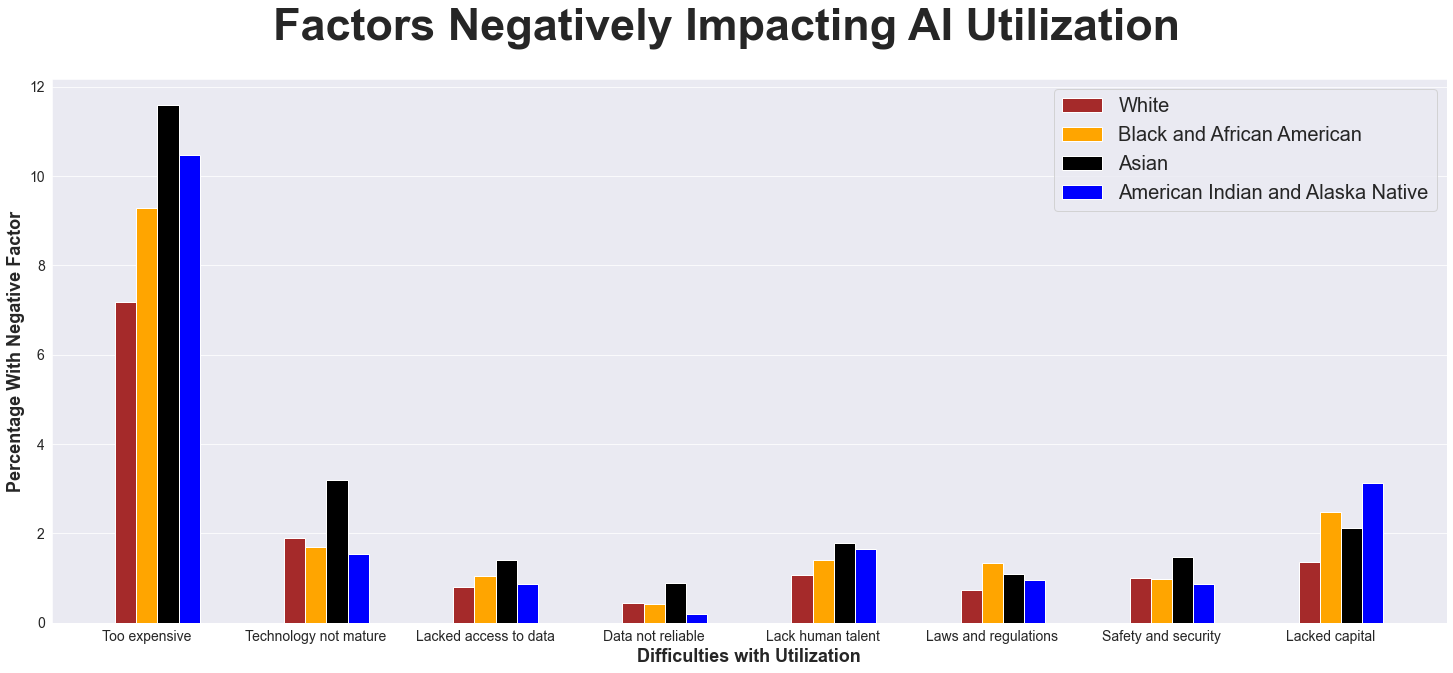

In [95]:
# Creating a clustered bar chart for negative factors affecting AI utilization
import matplotlib.pyplot as plt
import numpy as np

# set width of bars
barWidth = 0.5
 
# set heights of bars
bars1 = white_ai_list[0:8]
bars2 = black_ai_list[0:8]
bars3 = asian_ai_list[0:8]
bars4 = native_ai_list[0:8]

# Set position of bar on X axis
r1 = 4*np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Make the plot
plt.figure(figsize=(25,10))
plt.bar(r1, bars1, color='Brown', width=barWidth, edgecolor='white', label='White')
plt.bar(r2, bars2, color='Orange', width=barWidth, edgecolor='white', label='Black and African American')
plt.bar(r3, bars3, color='Black', width=barWidth, edgecolor='white', label='Asian')
plt.bar(r4, bars4, color='Blue', width=barWidth, edgecolor='white', label='American Indian and Alaska Native')


# Add xticks on the middle of the group bars
plt.xlabel('Difficulties with Utilization', fontweight='bold', fontsize = 18)
plt.xticks([4*r + barWidth for r in range(len(bars1))], ['Too expensive', 'Technology not mature', 'Lacked access to data', 'Data not reliable', 'Lack human talent','Laws and regulations','Safety and security','Lacked capital'],fontsize=14)
plt.suptitle('Factors Negatively Impacting AI Utilization', fontsize=45, fontweight = 'bold')
plt.ylabel('Percentage With Negative Factor',fontsize=18, fontweight = 'bold')

plt.yticks(fontsize = 14)
# Create legend & Show graphic
axes = plt.gca()
axes.xaxis.grid()
plt.legend(fontsize = 20)
plt.show()

In [96]:
##############################################
# Prepares data for pie charts for each race comparing all negative factors combined, no issues, and AI not relevant
   
df_white_ai_other = df_white[0:8]
sum_white_other = 0
for i in df_white_ai_other['FIRMPDEMP']:
    sum_white_other = sum_white_other + int(i)
df_white_ai_other = df_white[8:10]
z = []
for i in df_white_ai_other['FIRMPDEMP']:
    z.append(int(i))
white_ai_pie = [sum_white_other, z[0], z[1]]

df_black_ai_other = df_black[0:8]
sum_black_other = 0
for i in df_black_ai_other['FIRMPDEMP']:
    sum_black_other = sum_black_other + int(i)
df_black_ai_other = df_black[8:10]
z = []
for i in df_black_ai_other['FIRMPDEMP']:
    z.append(int(i))
black_ai_pie = [sum_black_other, z[0], z[1]]

df_asian_ai_other = df_asian[0:8]
sum_asian_other = 0
for i in df_asian_ai_other['FIRMPDEMP']:
    sum_asian_other = sum_asian_other + int(i)
df_asian_ai_other = df_asian[8:10]
z = []
for i in df_asian_ai_other['FIRMPDEMP']:
    z.append(int(i))
asian_ai_pie = [sum_asian_other, z[0], z[1]]

df_native_ai_other = df_native[12:20]
sum_native_other = 0
for i in df_native_ai_other['FIRMPDEMP']:
    sum_native_other = sum_native_other + int(i)
df_native_ai_other = df_native[20:22]
z = []
for i in df_native_ai_other['FIRMPDEMP']:
    z.append(int(i))
native_ai_pie = [sum_native_other, z[0], z[1]]

# Labaels for the pie chart
pie_labels = ['All AI Utilization Difficulties', 'AI Tech was not Applicable', 'No Difficulties']

# For the square chart- sums up the total for all races, reuses labels for the pie charts
square_totals = []
for i in range(0,3):
    square_totals.append(white_ai_pie[i]+black_ai_pie[i]+asian_ai_pie[i]+native_ai_pie[i])


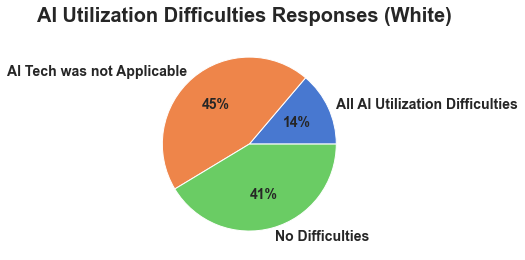

In [116]:
# Pie Charts
import seaborn
  
# declaring data
data = white_ai_pie
keys = pie_labels

# define Seaborn color palette to use
palette_color = seaborn.color_palette('muted')
seaborn.set_style("darkgrid")
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, textprops={'fontsize':14, 'fontweight':'bold'},
        autopct='%.0f%%')

# displaying chart
plt.suptitle('AI Utilization Difficulties Responses (White)', fontsize=20, fontweight = 'bold')
plt.show()

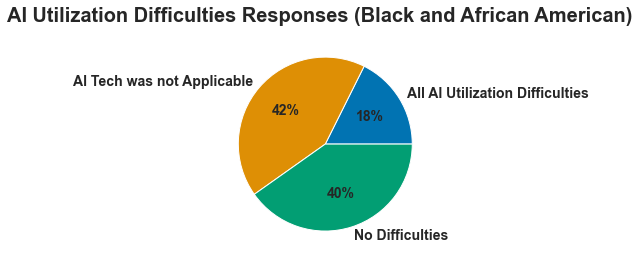

In [98]:
# declaring data
data = black_ai_pie
keys = pie_labels

# define Seaborn color palette to use
palette_color = seaborn.color_palette('colorblind')
seaborn.set_style("darkgrid")
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, textprops={'fontsize':14, 'fontweight':'bold'},
        autopct='%.0f%%')

# displaying chart
plt.suptitle('AI Utilization Difficulties Responses (Black and African American)', fontsize=20, fontweight = 'bold')
plt.show()

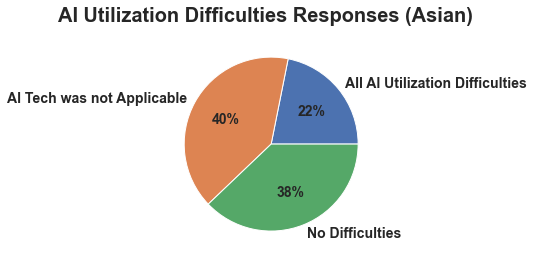

In [99]:
# declaring data
data = asian_ai_pie
keys = pie_labels

# define Seaborn color palette to use
palette_color = seaborn.color_palette('deep')
seaborn.set_style("darkgrid")
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, textprops={'fontsize':14, 'fontweight':'bold'},
        autopct='%.0f%%')

# displaying chart
plt.suptitle('AI Utilization Difficulties Responses (Asian)', fontsize=20, fontweight = 'bold')
plt.show()

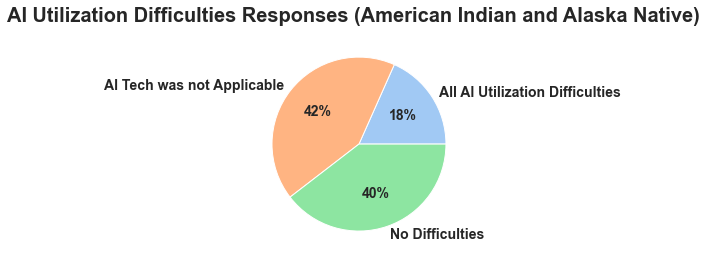

In [100]:
# declaring data
data = native_ai_pie
keys = pie_labels

# define Seaborn color palette to use
palette_color = seaborn.color_palette('pastel')
seaborn.set_style("darkgrid")
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, textprops={'fontsize':14, 'fontweight':'bold'},
        autopct='%.0f%%')

# displaying chart
plt.suptitle('AI Utilization Difficulties Responses (American Indian and Alaska Native)', fontsize=20, fontweight = 'bold')
plt.show()

<AxesSubplot:>

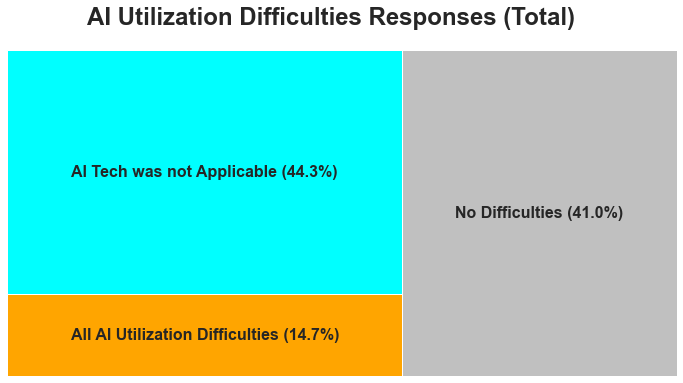

In [101]:
#Treemap for total
import squarify

square_labels = []
for i in range(0,3):
    square_labels.append(pie_labels[i] + ' (' +str(round(100*square_totals[i]/sum(square_totals), ndigits=1)) +'%)')

color = ['orange', 'cyan', 'silver']
plt.figure(figsize = (12,6))
plt.axis('off')
plt.suptitle('AI Utilization Difficulties Responses (Total)', fontsize=24, fontweight = 'bold')
squarify.plot(square_totals, color=color, label=square_labels, text_kwargs={'fontsize':16,'fontweight':'bold'})